<b><font size="6">|003|Regression|Salary from experience</font></b>
* **Author**: Dino Giovannoni, Francois Venter
* **Date:**: 2-July-2024


**The Problem:** 

A employment agency has collected data on data scientist salaries with corresponding years of experience from potential job-seekers. How can the agency use the data to predict the salary for a new client with a certain number of years of experience?

# Import libraries

It is good programming practice to load the all the required libraries at the beginning of the file.

There are three sets of libraries being loaded:

  + Firstly the libraries required for basic data manipulation and processing:
    * numpy
    * pandas   
    * IPython.display that is used for displaying pandas DataFrames in a better format in Jupyter notebooks (rather than using `print`.)
  + Secondly, the following libraries will be used for data visualization:
    * matplotlib 
  + Finally, we are loading some methods from the sklearn machine learning library.

In [5]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data

We can load the CSV file directly into a pandas dataframe as follows:

In [6]:
df = pd.read_excel('../data/SalariesVsExperience.xlsx', sheet_name='data')

# Understanding the Data

The first step must always be to understand the data we are dealing with. 
We will do this by loading the data and just "looking at the data".

## Inspect the data

After having loaded the data from the data file, it's usually a good idea to inspect the data. Fortunately, pandas provides a few methods to help with this task.

### A sample of data

The `DataFrame.head()` method displays the first 5 rows of the dataframe. (You could also use `DataFrame.tail()` to display the last 5 rows.)

In [7]:
display(df.head())

,Years Experience,Salary
0,1.1,25805
1,1.3,21393
2,1.5,23266
3,2.0,28108
4,2.2,31532


From this we see that there are two columns of data, each with numerical values.

### Inspect information about the dataframe 
Another useful pandas method is the `DataFrame.info()` method that provides a list of the DataFrame columns and the data types in each of the columns.

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years Experience  101 non-null    float64
 1   Salary            101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


None

Here we see that there are 101 data entries and no non-null values. In other words, there are no missing data values. This won't always be the case! In later examples, we will see various ways of dealing with missing or messy data values. We can see that the two data columns are `float64` and `int64` numbers.

## Exploratory Data Analysis

### Descriptive statistics

It is often useful to extract various descriptive statistics from the dataset.
Again, `pandas` comes to the rescue with a method that performs all the common descriptive statistics:

In [9]:
display(df.describe())

,Years Experience,Salary
count,101.000000,101.000000
mean,4.555446,41078.029703
std,2.801409,13414.617253
min,0.200000,19097.000000
25%,2.300000,31522.000000
50%,3.900000,38281.000000
75%,6.900000,50909.000000
max,10.000000,69765.000000


This is an extremely useful method in pandas as it quickly calculates  some descriptive statistics for the data.
For example, we can see that:
  * The data consists of 6 data points.
  * The **Marketing Expenditure** variable is in the range of R105,720 to a maximum of R603,730.
  * The **Sales Revenue** variable is in the range of R2,003,660 to a maximum of R6,369,420.
  
In addition, the mean, standard deviation and inter-quartile range boundaries are provided. 

## Visualization

It's almost always a good idea to visualiza the data in some way.
The quickest way to visualize data in a pandas dataframe is by using built in pandas methods.

To generate a scatter plot, we use the pandas built-in method as follows:

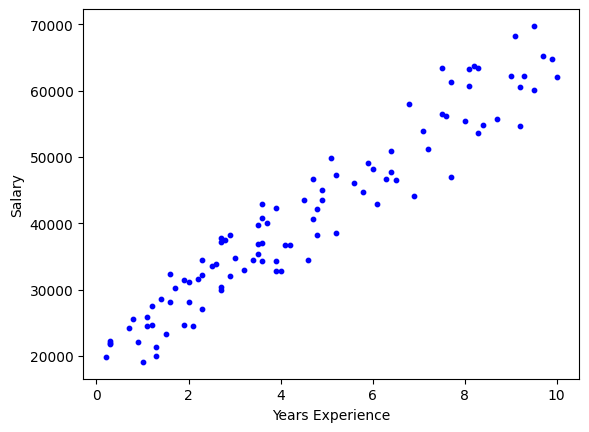

In [10]:
ax = df.plot.scatter(x='Years Experience', y='Salary', c='blue', s=10)

The importance of producing this plot is that we can immediately see that the data is approximately linear.
That means that a **linear regression model** could be appropriate model for the data.
(In later examples, we will encounter more sophisticated ways to make these kinds of decisions.)

It is also evident that the data is strongly correlated.

### Calculate the correlation coeffient

Display the correlation matrix.

In [11]:
df.corr()

,Years Experience,Salary
Years Experience,1.000000,0.959698
Salary,0.959698,1.000000


In [12]:
corr_matrix = df.corr().to_numpy()
print(f'The correlation coefficient is {np.round(corr_matrix[0][1],4)}')

The correlation coefficient is 0.9597


# Linear Regression Model

## Construct training data variable

Split the raw data into the input and output training data.

In [20]:
# Crude Way
# x_train = np.array(df['Years Experience']).reshape(-1, 1)
# y_train = np.array(df['Salary']).reshape(-1, 1)

# Using Dataframe
x_train = df['Years Experience'].to_frame()
y_train = df['Salary'].to_frame()
y_train.head()

,Salary
0,25805
1,21393
2,23266
3,28108
4,31532


## Construct and train model

In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

## Model parameters

We can extract the model parameters.

In [15]:
m = model.coef_[0][0]
c = model.intercept_[0]
print(f'Slope: {np.round(m,2)}, Intercept: {np.round(c,2)}')

Slope: 4595.54, Intercept: 20143.3


## Prediction for specific value

In [16]:
x_value = {"Years Experience" :4}

x_pred = pd.DataFrame(x_value, index = [0])
y_pred = model.predict(x_pred)
y_value = y_pred[0][0]
print(f'For {x_value}, the predicted monthly salary is R{np.round(y_value,2)}.')

For {'Years Experience': 4}, the predicted monthly salary is R38525.46.


## Plotting the Regression Line

Construct range of datapoints for the prediction.

In [17]:
xn = np.linspace(0,10,101)
x_values = {'Years Experience' : xn}

x = pd.DataFrame(x_values)
y = model.predict(x)

In [18]:
# An alternative way
# x = np.linspace(0,10,101)
# y = m*x+c

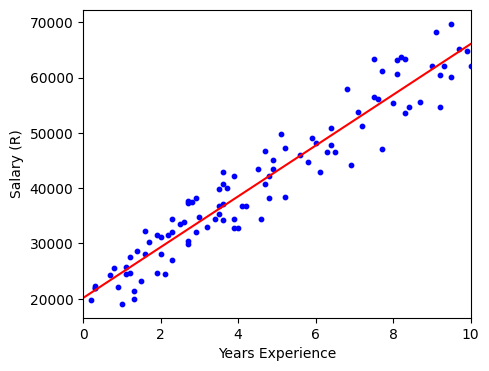

In [19]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(x_train, y_train, color='blue', s=10)
plt.plot(x,y, color='red')
plt.xlabel('Years Experience')
plt.ylabel('Salary (R)')
plt.xlim([0,10])
plt.show()